In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [5]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [7]:
#changing to binary values, creating dummy values, and then drop occupation and add new  features, HOT ENCODING
df = pd.concat([df.drop('occupation', axis=1),pd.get_dummies(df.occupation).add_prefix('occupation_')], axis =1)
df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass).add_prefix('workclass_')], axis =1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], prefix='marital-status')], axis=1)
df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship).add_prefix('relationship_')], axis =1)
df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race).add_prefix('race_')], axis =1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], prefix='native-country')], axis=1)

In [8]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [10]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

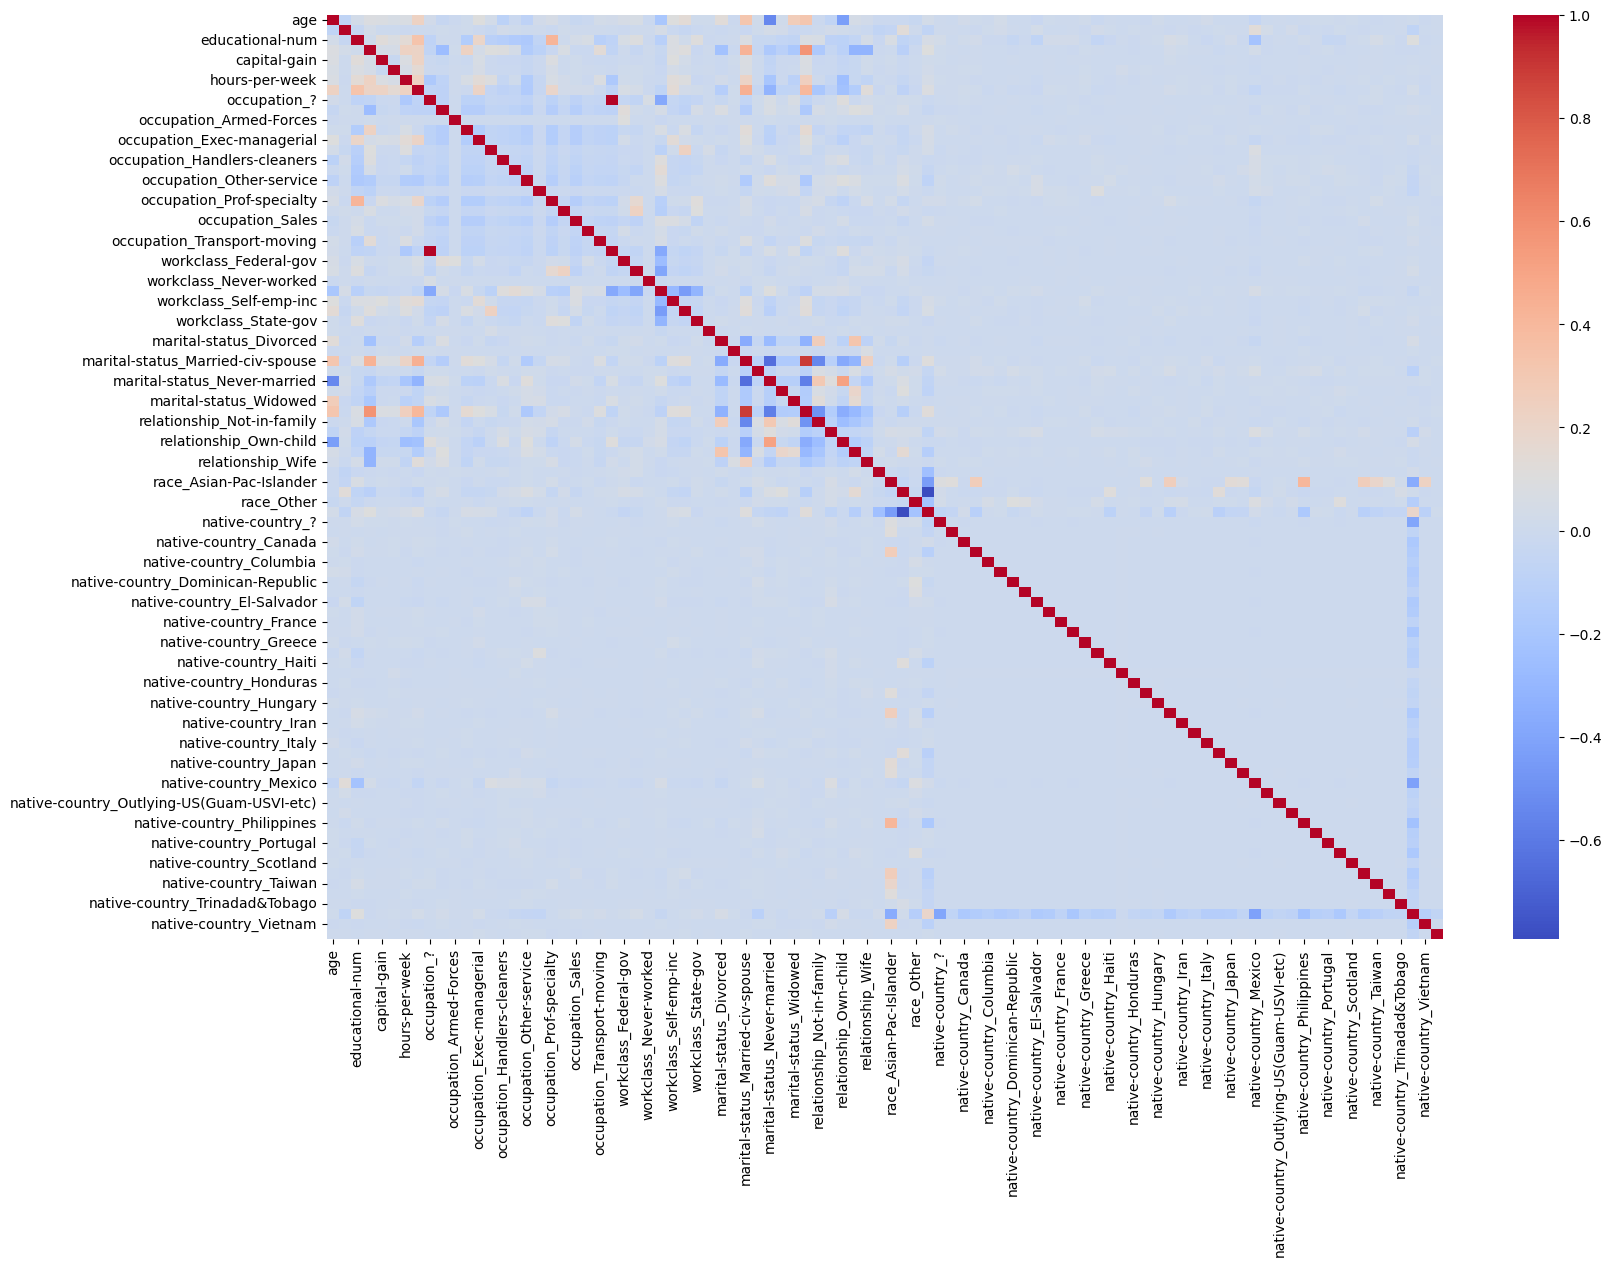

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap= 'coolwarm')

In [12]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [13]:
#Dropping the lowest correlations

correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [14]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

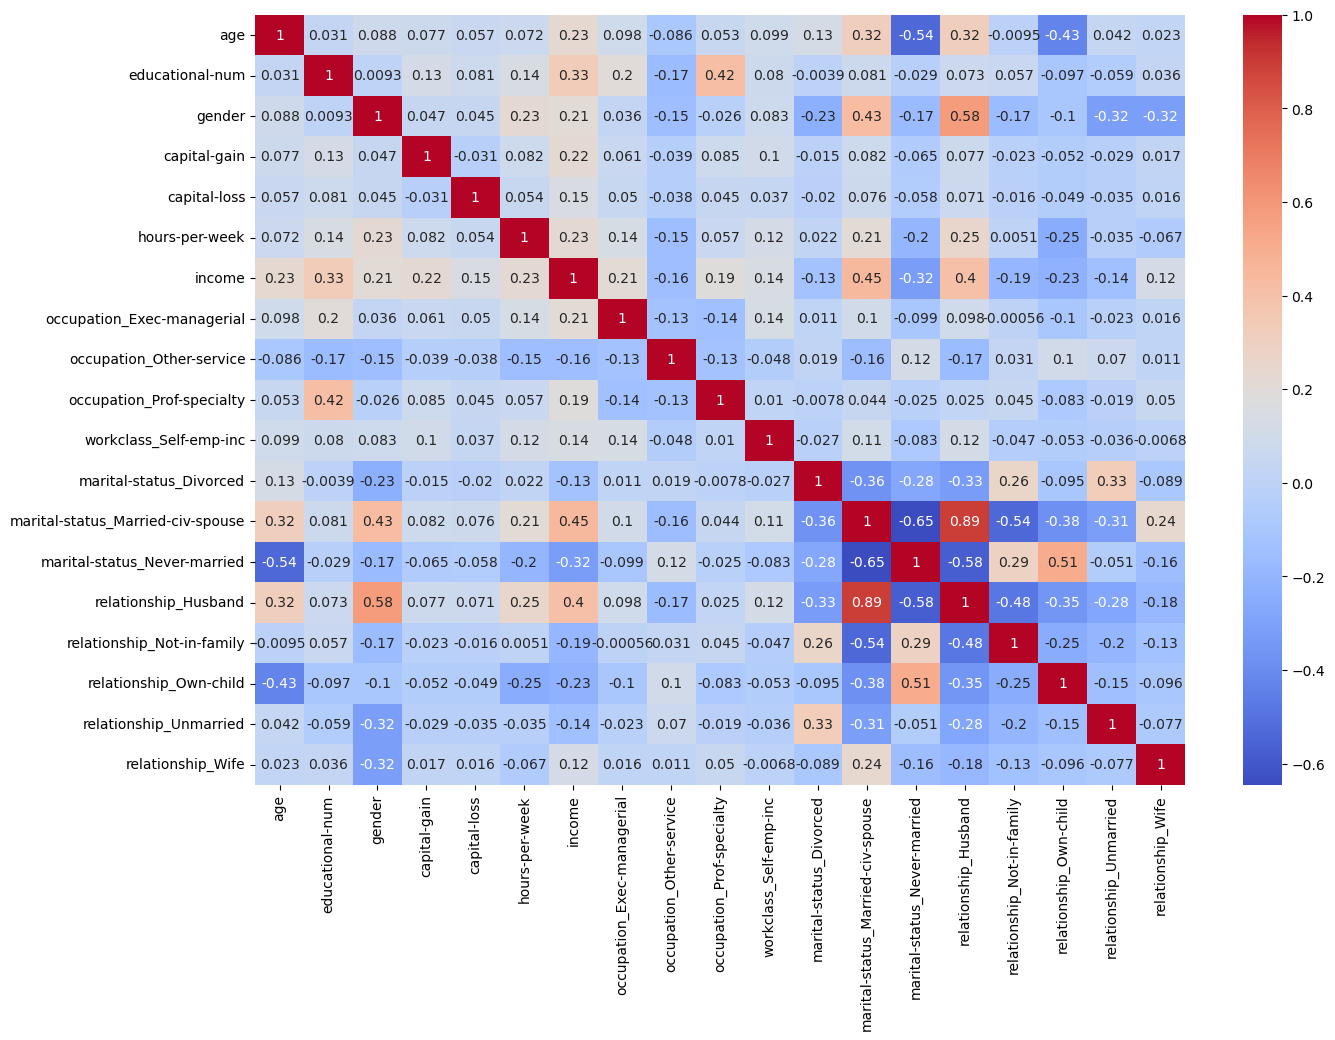

In [15]:
#replotting and seeing the correlations

plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap= 'coolwarm')

In [28]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df , test_df = train_test_split(df, test_size =0.2)


In [29]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
11552,51,13,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36713,59,10,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6013,57,4,1,0,0,90,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8264,44,9,1,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33514,25,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,38,13,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14629,44,11,1,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47919,50,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23977,40,10,1,4934,0,47,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
46124,36,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25612,34,13,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45069,45,11,0,0,0,55,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41550,36,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1827,32,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,64,14,1,0,0,20,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31088,33,9,1,0,0,70,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42113,46,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11681,60,10,1,0,1902,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
train_x = train_df.drop("income", axis=1)
train_y = train_df["income"]

test_x = test_df.drop("income", axis=1)
test_y = test_df["income"]

In [32]:
forest = RandomForestClassifier()

forest.fit(train_x, train_y)

RandomForestClassifier()

In [33]:
forest.score(test_x, test_y)

0.8516736615825571

In [34]:
forest.feature_importances_

array([2.30896421e-01, 1.28570569e-01, 1.49519753e-02, 1.07834863e-01,
       3.61720706e-02, 1.14751526e-01, 1.98522078e-03, 5.00219474e-03,
       1.22316119e-04, 5.95677268e-03, 1.98721513e-02, 4.50087244e-03,
       3.64336674e-03, 3.79169697e-03, 8.15812267e-03, 2.11982969e-04,
       1.87478044e-02, 2.80467245e-03, 5.98913965e-03, 4.33130527e-03,
       4.12807608e-03, 1.64533398e-03, 4.90892739e-03, 5.18877581e-03,
       2.61292797e-06, 8.93793280e-03, 6.38579764e-03, 7.72514994e-03,
       4.35876239e-03, 1.11550312e-04, 5.75047858e-03, 2.68209521e-04,
       8.04367889e-02, 1.01464974e-03, 2.33293843e-02, 1.86782916e-03,
       1.85264211e-03, 4.20128091e-02, 1.14284213e-02, 1.51954654e-03,
       8.79451632e-03, 6.15516756e-03, 1.04390561e-02, 1.45709555e-03,
       3.04646479e-03, 4.65911045e-03, 9.14789736e-04, 6.31133409e-03,
       2.88474861e-03, 3.51356557e-04, 1.28939020e-03, 6.50912776e-04,
       2.94594952e-04, 8.32894270e-04, 1.70670973e-04, 1.56515546e-04,
      

In [35]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [36]:
#Combining the features name and importances together

importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [37]:
importances

{'age': 0.2308964212894691,
 'educational-num': 0.12857056863047492,
 'hours-per-week': 0.11475152551401922,
 'capital-gain': 0.10783486336087272,
 'marital-status_Married-civ-spouse': 0.080436788879478,
 'relationship_Husband': 0.042012809092863763,
 'capital-loss': 0.03617207057873916,
 'marital-status_Never-married': 0.023329384298703956,
 'occupation_Exec-managerial': 0.01987215131965717,
 'occupation_Prof-specialty': 0.018747804352188067,
 'gender': 0.014951975328521425,
 'relationship_Not-in-family': 0.011428421311209424,
 'relationship_Wife': 0.010439056131628884,
 'workclass_Private': 0.008937932797092396,
 'relationship_Own-child': 0.008794516315981837,
 'occupation_Other-service': 0.008158122674107706,
 'workclass_Self-emp-not-inc': 0.007725149944118658,
 'workclass_Self-emp-inc': 0.00638579764169603,
 'race_White': 0.006311334093626113,
 'relationship_Unmarried': 0.00615516755700533,
 'native-country_United-States': 0.006111809299024126,
 'occupation_Sales': 0.00598913964969

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 250],
    'max_depth': [5, 10 , 30 , None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator =RandomForestClassifier(), param_grid=param_grid, verbose =10)

In [41]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [42]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [43]:
forest = grid_search.best_estimator_

In [44]:
forest.score(test_x, test_y)

0.8650834271675709

In [45]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [46]:
importances

{'age': 0.1480098951116066,
 'educational-num': 0.13390496521013073,
 'capital-gain': 0.12999743996279522,
 'marital-status_Married-civ-spouse': 0.09017030762103147,
 'hours-per-week': 0.08868681792254679,
 'relationship_Husband': 0.05494154597008923,
 'capital-loss': 0.04267110854062074,
 'marital-status_Never-married': 0.03819850116237112,
 'occupation_Exec-managerial': 0.026074858619820437,
 'occupation_Prof-specialty': 0.0226349698901774,
 'relationship_Not-in-family': 0.01774731600567809,
 'gender': 0.015382276243725054,
 'relationship_Own-child': 0.013615980280465212,
 'occupation_Other-service': 0.011688627970126786,
 'marital-status_Divorced': 0.010118349610698074,
 'relationship_Wife': 0.01010401635658752,
 'relationship_Unmarried': 0.00867661674969424,
 'workclass_Self-emp-inc': 0.008271455760553376,
 'workclass_Private': 0.008114721924683035,
 'workclass_Self-emp-not-inc': 0.007896484690974197,
 'occupation_Craft-repair': 0.006162929489972106,
 'native-country_United-States'